In [11]:
import pandas as pd
from pathlib import Path

csv_path = Path('../data/avocado.csv')
df = pd.read_csv(csv_path, parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
region_volume = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()

top10 = region_volume.head(10)
print(top10)

         region  Total Volume
0       TotalUS  5.864740e+09
1          West  1.086779e+09
2    California  1.028982e+09
3  SouthCentral  1.011280e+09
4     Northeast  7.132809e+08
5     Southeast  6.152384e+08
6    GreatLakes  5.896425e+08
7      Midsouth  5.083494e+08
8    LosAngeles  5.078965e+08
9        Plains  3.111885e+08


In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'  # Windows 기본 한글 폰트
elif platform.system() == 'Darwin':
    font_name = 'AppleGothic'    # Mac 기본 한글 폰트
else:
    font_name = 'NanumGothic'    # Linux용 대체 폰트 (설치 필요할 수도)

plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지


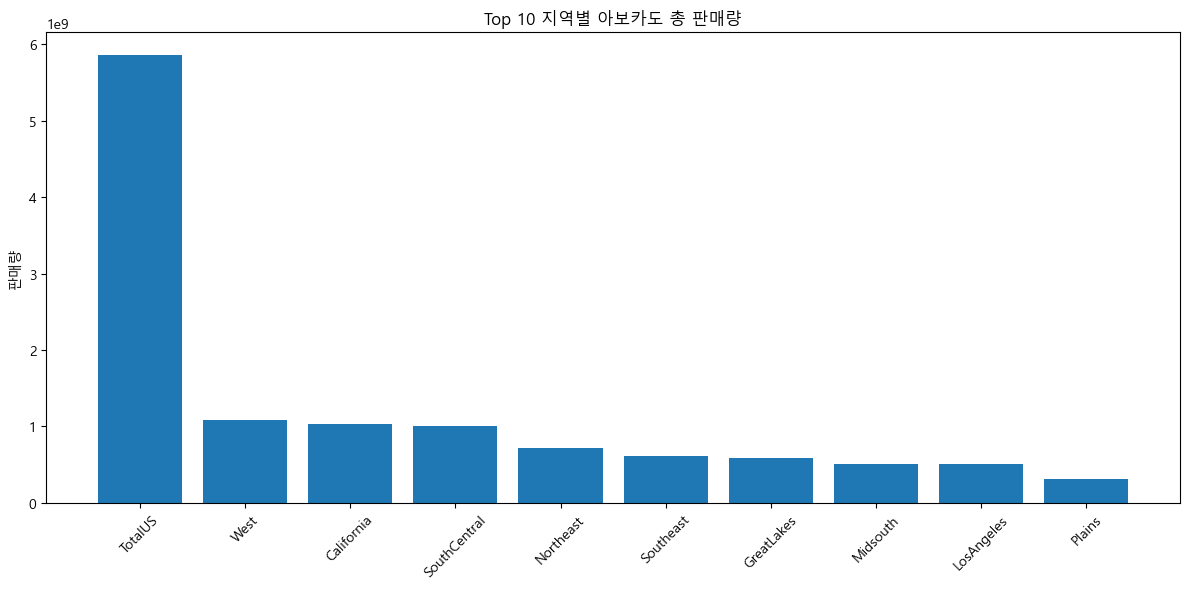

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10['region'], top10['Total Volume'])
plt.title('Top 10 지역별 아보카도 총 판매량')
plt.ylabel('판매량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

plu_df = df[['region', '4046', '4225', '4770']].copy()

for col in ['4046', '4225', '4770']:
    plu_df[col] = pd.to_numeric(plu_df[col], errors='coerce')

plu_by_region = plu_df.groupby('region')[['4046', '4225', '4770']].sum().reset_index()

plu_by_region['Top PLU'] = plu_by_region[['4046', '4225', '4770']].idxmax(axis=1)

print(plu_by_region[['region', 'Top PLU']].head())

                region Top PLU
0               Albany    4225
1              Atlanta    4046
2  BaltimoreWashington    4225
3                Boise    4046
4               Boston    4225
